# Connections between MKs 
## **MK = Member of the knesset  (חבר כנסת)
Based on transcripts of the knesset committees.<br/>
The work was done in the 'public knowledge workshop' hackathon and won 3rd place prize.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,15)

G = nx.read_gml('./Mk_connections_graph')
G.remove_node('האירק')

In [2]:
#Reverting the Mks names since hebrew is printed reversed :)
def reverse(some_list):
    return [item[::-1] for item in some_list]

def print_reversed(dictionary):
    return [(key[::-1] , value) for (key, value) in sorted(dictionary.items() ,key=lambda x: x[1] ,reverse=True)]
    

In [3]:
heads_of_committees = set(['מיקי זוהר', 'משה גפני', 'איתן כבל'
                       ,'אבי דיכטר', 'יואב קיש', 'דוד ביטן', 'צחי הנגבי',
                       'דוד אמסלם', 'ניסן סלומינסקי', 'אברהם נגוסה', 'יעקב מרגי',
                       'אלי אלאלוף' ,'שלי יחימוביץ' ,'עאידה תומא סלימאן',
                      'קארין אלהרר', 'אורי מקלב', 'יצחק וקנין', 'איל בן ראובן'])


def without_committee_heads(mks_list):
    return [(mk,d) for (mk,d) in mks_list if mk not in heads_of_committees_reversed]

In [4]:
pos = nx.spring_layout(G, k=1, scale=10000)

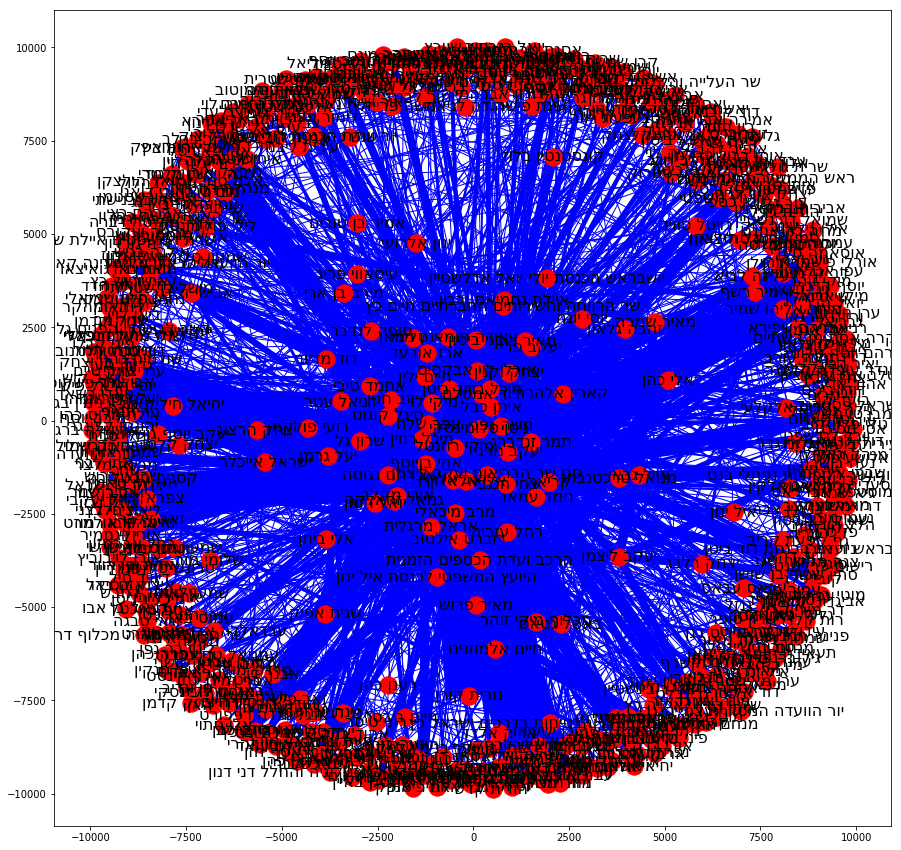

In [5]:
def draw_graph(G, arrows=False):
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=16)

    weights = set([])
    for n1,n2 in G.edges():
        weight = G.get_edge_data(n1,n2)['weight']
        weights.add(weight)

    for weight in weights:
        edges_with_weight = [edge for edge in G.edges() if weight == G.get_edge_data(*edge)['weight']]
        nx.draw_networkx_edges(G, pos, edgelist=edges_with_weight, width=weight, arrows=arrows, edge_color='b', arrow_style='->')

draw_graph(G)

# Degree of node:

In [6]:
def reverse(some_list):
    return [item[::-1] for item in some_list]

def print_reversed(dictionary):
    dictionary = dict(dictionary)
    return [(key[::-1] , value) for (key, value) in sorted(dictionary.items() ,key=lambda x: x[1] ,reverse=True)]

## The MKs with the highest total degree

In [15]:
print_reversed(G.degree())[:10]

[('איתן כבל', 128),
 ('יעקב מרגי', 122),
 ('דוד אמסלם', 119),
 ('ניסן סלומינסקי', 114),
 ('משה גפני', 112),
 ('אלי אלאלוף', 105),
 ('זאב אלקין', 104),
 ('אורי מקלב', 77),
 ('אברהם נגוסה', 71),
 ('יצחק וקנין', 67)]

### We can see that these are mostly the head of the committees, which makes sense.. <br/>Let's remove them

In [43]:
without_committee_heads(print_reversed(G.degree()))[:10]

[('זאב אלקין', 104),
 ('מיקי רוזנטל', 65),
 ('מיקי לוי', 62),
 ('חיים ילין', 57),
 ('מיכל רוזין', 50),
 ('תמר זנדברג', 48),
 ('עפר שלח', 45),
 ('יעקב פרי', 45),
 ('אראל מרגלית', 43),
 ('אורלי לוי אבקסיס', 43)]

## The MKs with the highest in degree
The mks that are spoken to the most

In [8]:
print_reversed(G.in_degree())[:10]

[('יעקב מרגי', 52),
 ('דוד אמסלם', 51),
 ('ניסן סלומינסקי', 47),
 ('משה גפני', 46),
 ('איתן כבל', 45),
 ('אלי אלאלוף', 45),
 ('זאב אלקין', 38),
 ('אברהם נגוסה', 35),
 ('אורי מקלב', 28)]

Without head of the committees

In [44]:
without_committee_heads(print_reversed(G.in_degree()))[:10]

[('זאב אלקין', 37),
 ('מיקי רוזנטל', 27),
 ('מיקי לוי', 25),
 ('עפר שלח', 24),
 ('אחמד טיבי', 23),
 ('חיים ילין', 23),
 ('אראל מרגלית', 21),
 ('יעקב פרי', 21),
 ('זהבה גלאון', 20),
 ('מיכל רוזין', 20)]

## The MKs with the highest in degree
The mks that speaks to others the most

In [20]:
print_reversed(G.out_degree())[:10]

[('איתן כבל', 85),
 ('יעקב מרגי', 71),
 ('דוד אמסלם', 69),
 ('זאב אלקין', 68),
 ('ניסן סלומינסקי', 68),
 ('משה גפני', 67),
 ('אלי אלאלוף', 62),
 ('אורי מקלב', 49),
 ('יצחק וקנין', 42),
 ('מיקי רוזנטל', 39)]

In [45]:
without_committee_heads(print_reversed(G.out_degree()))[:10]

[('זאב אלקין', 67),
 ('מיקי רוזנטל', 38),
 ('מיקי לוי', 37),
 ('חיים ילין', 34),
 ('מיכל רוזין', 30),
 ('אתי בןיוסף', 30),
 ('דב חנין', 28),
 ('תמר זנדברג', 28),
 ('יעקב פרי', 24),
 ('אורלי לוי אבקסיס', 23)]

## The MKs with the highest centrality
The most central mks

In [190]:
print_reversed(nx.degree_centrality(G))[:10]

[('איתן כבל', 0.19637462235649547),
 ('יעקב מרגי', 0.18580060422960726),
 ('דוד אמסלם', 0.18126888217522658),
 ('ניסן סלומינסקי', 0.17371601208459214),
 ('משה גפני', 0.17069486404833836),
 ('אלי אלאלוף', 0.16163141993957703),
 ('זאב אלקין', 0.16012084592145015),
 ('קריאה', 0.13444108761329304),
 ('אורי מקלב', 0.1163141993957704),
 ('אברהם נגוסה', 0.11027190332326284)]

In [46]:
without_committee_heads(print_reversed(nx.degree_centrality(G)))[:10]

[('זאב אלקין', 0.1573373676248109),
 ('מיקי רוזנטל', 0.09833585476550681),
 ('מיקי לוי', 0.09379727685325265),
 ('חיים ילין', 0.08623298033282904),
 ('מיכל רוזין', 0.07564296520423601),
 ('תמר זנדברג', 0.07261724659606657),
 ('עפר שלח', 0.0680786686838124),
 ('יעקב פרי', 0.0680786686838124),
 ('אראל מרגלית', 0.06505295007564296),
 ('אורלי לוי אבקסיס', 0.06505295007564296)]

# Who did I talk to/about

In [6]:
def draw_out_subgraph_of_node(some_node, arrows=False):
    some_node = some_node[::-1]
    neighbors = list(G.neighbors(some_node))
    neighbors.append(some_node)
    draw_graph(G.subgraph(neighbors), arrows)

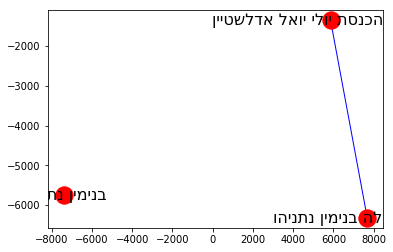

In [12]:
draw_out_subgraph_of_node('ראש הממשלה בנימין נתניהו')
draw_out_subgraph_of_node('בנימין נתניהו')

Benjamin Netanyahu doesn't attend the Knesset committees and even if he do he only talks to Yuli Edelstein.

# Who talked about me

In [31]:
def draw_in_subgraph_of_node(some_node, arrows=False):
    some_node = some_node[::-1]
    neighbors = list(G.to_undirected().neighbors(some_node))
    neighbors.append(some_node)
    draw_graph(G.subgraph(neighbors), arrows)

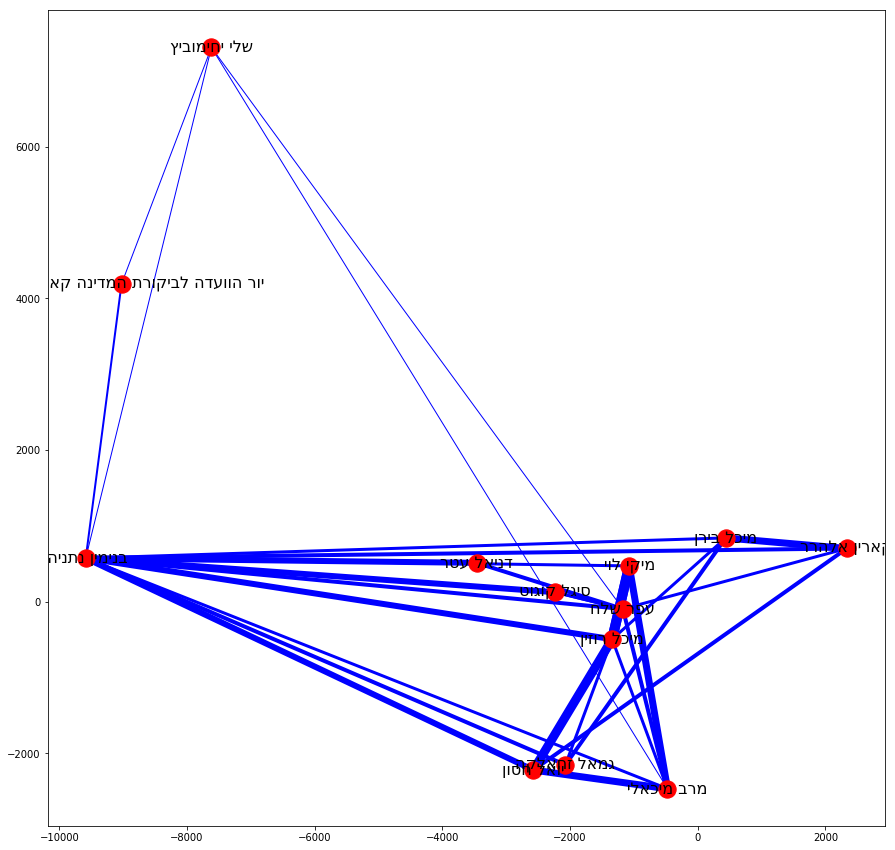

In [32]:
draw_in_subgraph_of_node('בנימין נתניהו')

A lot of people are talking about Benjamin Netanyahu. (Even though the committees should be subject-based)

Just to name a few:
- Karin Elarar was head committee of state audit. Benjamin Netanyahu is suspected with fraud.
- Jamal Zhalaka is talking about Benjamin Netanyahu because he is not satisfied with the state of Israeli-Arabs.